In [30]:
from google.colab import drive
drive.mount('/content/drive')
import os
current_directory = os.getcwd()
print(current_directory)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# Load the data
data = pd.read_csv('/content/drive/My Drive/Project_2/Weather_prediction/Quang_Binh/data/full_parameter/edited.csv')

# Preprocessing function
def preprocess_data(data):
    date_time = pd.to_datetime(data['time'], format = 'ISO8601')
    data.set_index(date_time, inplace=True)
    data.drop(['time'], axis=1, inplace=True)
    return data

data = preprocess_data(data)
features =   ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'apparent_temperature (°C)',
              'precipitation (mm)', 'rain (mm)', 'weather_code (wmo code)', 'pressure_msl (hPa)',
              'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)',
              'cloud_cover_high (%)', 'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
              'wind_direction_100m (°)', 'wind_gusts_10m (km/h)'
              ]
target = 'rain (mm)'

data = data.dropna() # Handle missing values if any
# data.head()

,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),weather_code (wmo code),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),...,wind_direction_100m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
time,,,,,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,14.4,94,13.5,14.9,0.0,0.0,0,1016.7,1015.5,9,...,180,7.6,16.8,19.8,21.0,23.5,0.463,0.468,0.458,0.464
2001-01-01 01:00:00,13.9,95,13.1,14.1,0.0,0.0,0,1016.7,1015.5,6,...,217,8.3,16.4,19.6,21.0,23.5,0.463,0.468,0.458,0.464
2001-01-01 02:00:00,13.5,96,12.8,13.7,0.0,0.0,1,1016.2,1015.0,38,...,247,8.3,16.1,19.5,21.0,23.5,0.462,0.467,0.458,0.464
2001-01-01 03:00:00,13.2,97,12.7,13.3,0.0,0.0,1,1015.6,1014.4,37,...,259,9.7,16.0,19.3,21.0,23.5,0.462,0.467,0.458,0.464
2001-01-01 04:00:00,13.3,97,12.8,13.3,0.0,0.0,1,1015.4,1014.2,38,...,266,11.2,16.0,19.1,21.0,23.5,0.461,0.467,0.458,0.464


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature_2m (°C),207872.0,26.908016,2.897599,16.4,24.8,26.3,28.8,38.7
surface_pressure (hPa),207872.0,1005.522281,2.345127,995.4,1003.9,1005.4,1007.1,1016.6
relative_humidity_2m (%),207872.0,79.425704,15.313712,21.0,70.0,83.0,92.0,100.0
rain (mm),207872.0,0.230354,0.844700,0.0,0.0,0.0,0.1,53.4
surface_pressure (hPa),207872.0,1005.522281,2.345127,995.4,1003.9,1005.4,1007.1,1016.6
cloud_cover (%),207872.0,44.532914,27.242284,0.0,26.0,40.0,62.0,100.0
cloud_cover_low (%),207872.0,14.595285,20.108979,0.0,1.0,7.0,19.0,100.0
cloud_cover_mid (%),207872.0,21.982773,25.976349,0.0,3.0,13.0,30.0,100.0
cloud_cover_high (%),207872.0,65.021706,38.296292,0.0,28.0,85.0,98.0,100.0
wind_speed_10m (km/h),207872.0,7.710011,4.032094,0.0,4.7,6.9,10.3,36.4


In [ ]:
data['rain (mm)'] = np.log1p(data['rain (mm)']) # Log transform the precipitation

# Split data into features and target
X = data[features].values
y = data[target].values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Feature selection with Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Use Random Forest for feature selection
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

RandomForestRegressor(random_state=42)

In [ ]:
# Get feature importance
importance = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

                      Feature    Importance
3                   rain (mm)  9.999954e-01
2   apparent_temperature (°C)  2.621336e-06
0         temperature_2m (°C)  7.720096e-07
4      surface_pressure (hPa)  5.030435e-07
6         cloud_cover_low (%)  2.447809e-07
9       wind_speed_10m (km/h)  1.274585e-07
7         cloud_cover_mid (%)  1.025281e-07
12    wind_direction_100m (°)  7.311844e-08
10     wind_speed_100m (km/h)  6.125177e-08
5             cloud_cover (%)  5.664380e-08
11     wind_direction_10m (°)  4.964497e-08
1    relative_humidity_2m (%)  3.367812e-08
8        cloud_cover_high (%)  2.389483e-09


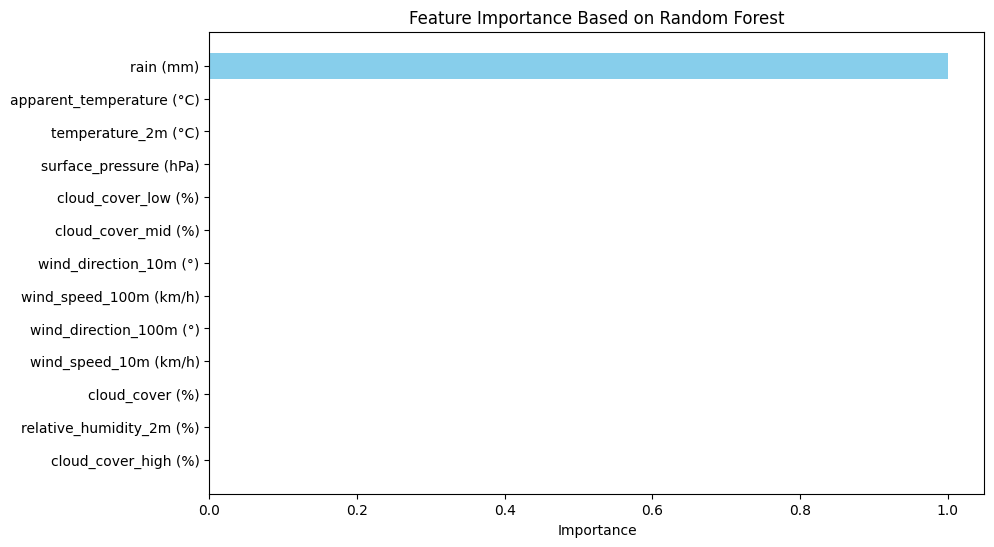

In [ ]:
import matplotlib.pyplot as plt
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance Based on Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [ ]:
  # Select the top N features (for example, top 3)
top_features = feature_importance['Feature'][:3].values
top_feature_indices = [list(features).index(f) for f in top_features]
print(top_feature_indices)

In [ ]:
top_feature_indices = [3, 2, 0, 4]
X_selected = X_scaled[:, top_feature_indices]

# Create sequences
def create_sequences(X, y, time_steps):
    sequences = []
    labels = []
    for i in range(len(X) - time_steps):
        sequences.append(X[i:(i + time_steps)])
        labels.append(y[i + time_steps])
    return np.array(sequences), np.array(labels)

time_steps = 24
X_seq, y_seq = create_sequences(X_selected, y, time_steps)

In [ ]:
# Split the data into training and test sets
train_size = int(len(X) * 0.9)
X_train, y_train = X_seq[:train_size], y_seq[:train_size]
X_test, y_test = X_seq[train_size:], y_seq[train_size:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (187358, 24, 4), y_train shape: (187358,)
X_test shape: (20794, 24, 4), y_test shape: (20794,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model():
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(time_steps, X_selected.shape[1])))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(1, activation='relu'))  # Ensuring non-negative predictions with ReLU
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 24, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,569 (459.25 KB)

 Trainable params: 117,569 (459.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
# Train the model with checkpoints
checkpoint_path = "/content/drive/My Drive/Project_2/Weather_prediction/Quang_Binh/checkpoint/precipitation_model.keras"
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint(checkpoint_path, monitor='loss', save_weights_only=False, save_freq='epoch')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=33, validation_split=None, callbacks=[early_stopping, checkpoint])

Epoch 1/100
5110/5110 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - loss: 0.0312 - val_loss: 0.0465
Epoch 2/100
5110/5110 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - loss: 0.0268 - val_loss: 0.0450
Epoch 3/100
5110/5110 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 0.0260 - val_loss: 0.0442
Epoch 4/100
5110/5110 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 0.0261 - val_loss: 0.0458
Epoch 5/100
5110/5110 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 0.0258 - val_loss: 0.0444
Epoch 6/100
5110/5110 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - loss: 0.0255 - val_loss: 0.0457
Epoch 7/100
5110/5110 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 0.0250 - val_loss: 0.0443
Epoch 8/100
5110/5110 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 0.0250 - val_loss: 0.0441
Epoch 9/100
5110/5110 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 0.0246 - val_loss: 0.0435
Epoch 10/100
5110/5110 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - loss: 0.0247 - val_loss: 0.0438
Epoch 11/100
5110/5110 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - loss: 0.0248 - val_loss: 0.0440
Epoch 12

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = model.predict(X_test)



650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
# Inverse log transform the predictions and true values
y_pred_inverse = np.expm1(y_pred)
y_test_inverse = np.expm1(y_test)

# Evaluate the model
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 0.8305863477213649
Mean Absolute Error (MAE): 0.24315091594952923
R-squared: 0.35388386824004925


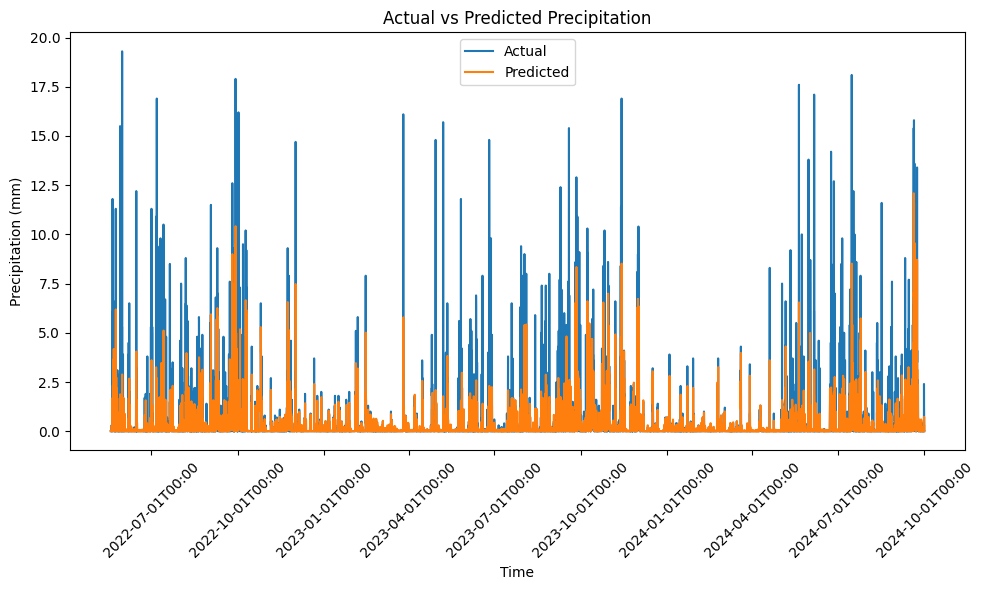

In [ ]:
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/My Drive/Project_2/Weather_prediction/Quang_Binh/data/full_parameter/edited.csv')
date_time = pd.to_datetime(data['time'], format = 'ISO8601')

time_test = date_time[train_size + time_steps:]

# Plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(time_test, y_test_inverse, label='Actual')
plt.plot(time_test, y_pred_inverse, label='Predicted')

# Formatting the x-axis to show ISO8601 time format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%dT%H:%M'))

plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.title('Actual vs Predicted Precipitation')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Application**

In [ ]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

def create_sequences(X, y, time_steps):
    sequences = []
    labels = []
    for i in range(len(X) - time_steps):
        sequences.append(X[i:(i + time_steps)])
        labels.append(y[i + time_steps])
    return np.array(sequences), np.array(labels)

# Load the data
data_app = pd.read_csv('/content/drive/My Drive/Project_2/Weather_prediction/Quang_Binh/data/application/thang10_2024.csv')

time_app = pd.to_datetime(data_app['time'], format = 'ISO8601')
time_list = data_app['time'].astype('str').tolist()
data_app.set_index(time_app, inplace=True)
# Drop unnecessary columns
data_app = data_app.drop(['time'], axis=1)

features = ['temperature_2m (°C)', 'apparent_temperature (°C)', 'precipitation (mm)', 'surface_pressure (hPa)']
target = 'precipitation (mm)'

data_app['precipitation (mm)'] = np.log1p(data_app['precipitation (mm)'])

scaler = StandardScaler()
scaled_app = scaler.fit_transform(data_app[features].values)

X_app, y_app = create_sequences(scaled_app, data_app[target].values, 24)

model = load_model('/content/drive/My Drive/Project_2/Weather_prediction/Quang_Binh/checkpoint/precipitation_model.keras')
y_pred_app = model.predict(X_app)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_app_inverse = np.expm1(y_pred_app)
y_app_inverse = np.expm1(y_app)

# Calculate metrics
mse = mean_squared_error(y_app_inverse, y_pred_app_inverse)
mae = mean_absolute_error(y_app_inverse, y_pred_app_inverse)
r2 = r2_score(y_app_inverse, y_pred_app_inverse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 1.4065399747653478
Mean Absolute Error (MAE): 0.5391282565566426
R-squared: -0.2696345954742181


In [ ]:
np.savetxt('/content/drive/My Drive/Project_2/Weather_prediction/Quang_Binh/data/application/output_predict/thang10_pred.csv',
           y_pred_app_inverse, delimiter=',', fmt='%.2f')

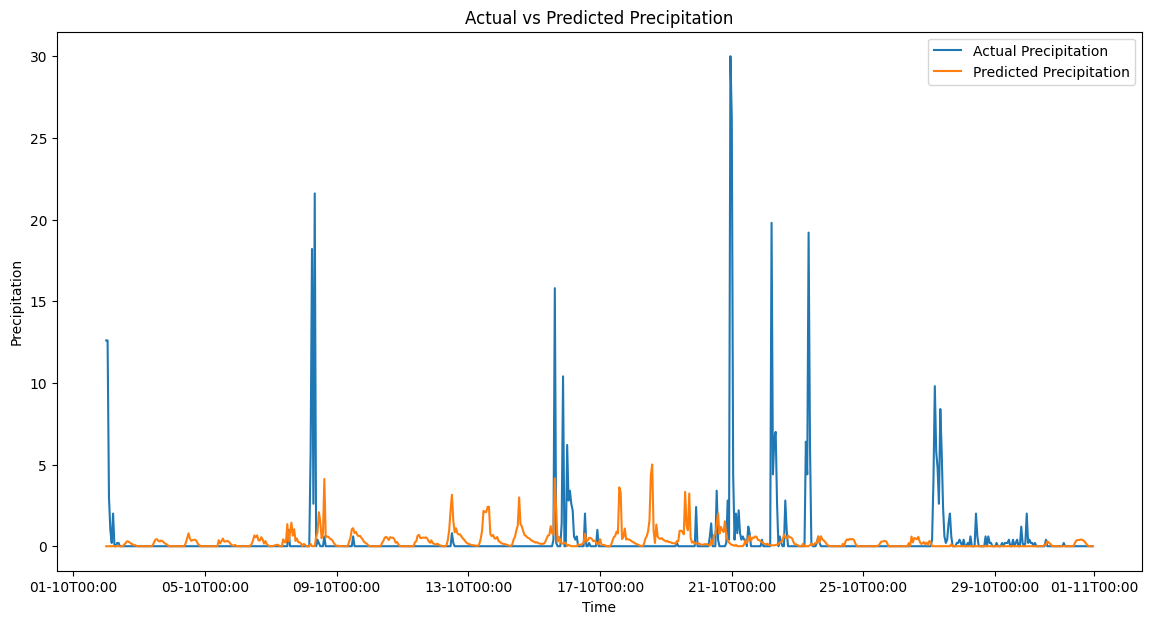

In [ ]:
import matplotlib.pyplot as plt
data_vrain = pd.read_csv('/content/drive/My Drive/Project_2/Weather_prediction/Quang_Binh/data/application/compare.csv')
y_vrain = data_vrain['precipitation (mm)']
# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(time_app[24:],y_vrain[24:], label='Actual Precipitation')
plt.plot(time_app[24:],y_pred_app_inverse, label='Predicted Precipitation')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%mT%H:%M'))
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('Actual vs Predicted Precipitation')
plt.legend()
plt.show()

**Demo**

In [ ]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib
# Load the data
data_app = pd.read_csv('/content/drive/My Drive/Project_2/Weather_prediction/10_features_24_steps/test.csv')

# Create sequences
def create_sequences(X, y, time_steps):
    sequences = []
    labels = []
    for i in range(len(X) - time_steps):
        sequences.append(X[i:(i + time_steps)])
        labels.append(y[i + time_steps])
    return np.array(sequences), np.array(labels)

time_app = pd.to_datetime(data_app['time'], format = 'ISO8601')
time_list = data_app['time'].astype('str').tolist()
data_app.set_index(time_app, inplace=True)
# Drop unnecessary columns
data_app = data_app.drop(['time'], axis=1)

features = ['temperature_2m (°C)', 'apparent_temperature (°C)', 'rain (mm)']
target = 'rain (mm)'

data_app['rain (mm)'] = np.log1p(data_app['rain (mm)'])

scaler = StandardScaler()
scaled_app = scaler.fit_transform(data_app[features].values)

X_app, y_app = create_sequences(scaled_app, data_app[target].values, 24)

model = load_model('/content/drive/My Drive/Project_2/Weather_prediction/10_features_24_steps/checkpoint/precipitation_model.keras')
y_pred_app = model.predict(X_app)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


In [ ]:
y_pred_app_inverse = np.expm1(y_pred_app)
y_app_inverse = np.expm1(y_app)

# Calculate metrics
mse = mean_squared_error(y_app_inverse, y_pred_app_inverse)
mae = mean_absolute_error(y_app_inverse, y_pred_app_inverse)
r2 = r2_score(y_app_inverse, y_pred_app_inverse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 0.1390094101338419
Mean Absolute Error (MAE): 0.21474123699590564
R-squared: 0.0


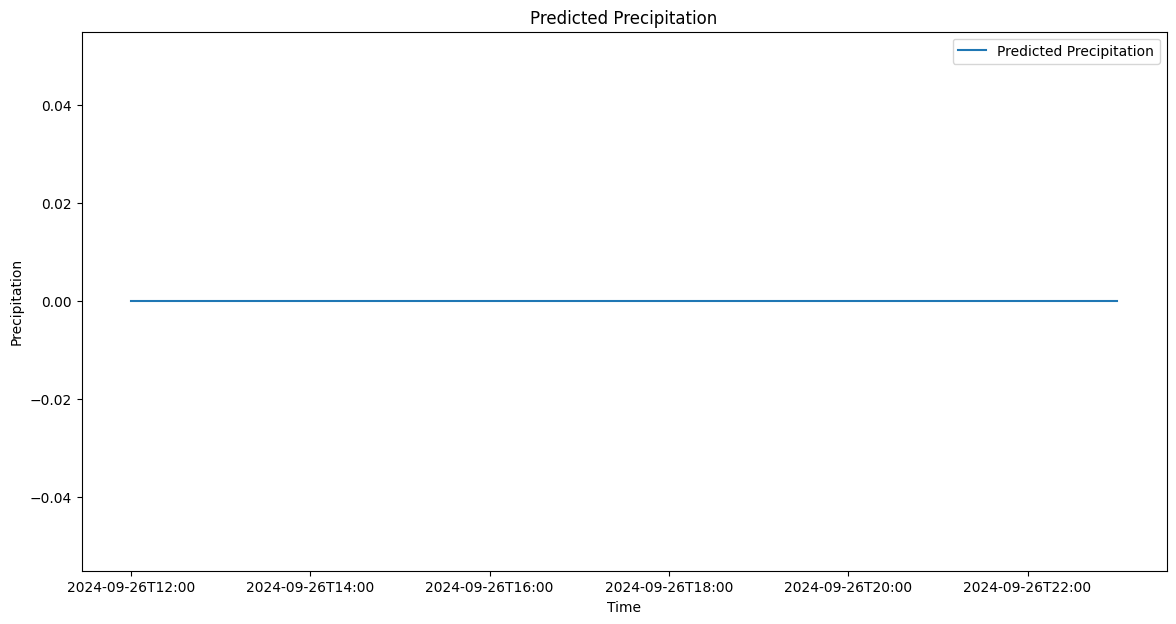

In [ ]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(time_app[36:],y_app_inverse[12:], label='Predicted Precipitation')
# plt.plot(time_app[24:],y_pred_app_inverse, label='Predicted Precipitation')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%dT%H:%M'))
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('Predicted Precipitation')
plt.legend()3
plt.show()

##Tìm các feature important với dữ liệu forecast và historical

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# Load the data
data = pd.read_csv('/content/drive/My Drive/Project_2/Weather_prediction/Quang_Binh/data/important/Importance.csv')

# Preprocessing function
def preprocess_data(data):
    date_time = pd.to_datetime(data['time'], format = 'ISO8601')
    data.set_index(date_time, inplace=True)
    data.drop(['time'], axis=1, inplace=True)
    return data, date_time

data, date_time = preprocess_data(data)
features =   ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'apparent_temperature (°C)',
              'weather_code (wmo code)', 'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)',
              'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)', 'et0_fao_evapotranspiration (mm)',
              'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
              'wind_direction_100m (°)', 'wind_gusts_10m (km/h)', 'rain (mm) _ Forcast']
target = 'rain (mm) _ Historical'


In [32]:
# data['rain (mm) _ Forcast'], data['rain (mm) _ Historical'] = np.log1p(data['rain (mm) _ Forcast']), np.log1p(data['rain (mm) _ Historical']) # Log transform the precipitation

# Split data into features and target
X = data[features].values
y = data[target].values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Use Random Forest for feature selection
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled[:len(X_scaled) - 24], y[24:])

RandomForestRegressor(random_state=42)

In [ ]:
# Get feature importance
importance = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                            Feature  Importance
14           wind_speed_100m (km/h)    0.100664
3         apparent_temperature (°C)    0.092831
9               cloud_cover_mid (%)    0.086772
17            wind_gusts_10m (km/h)    0.075114
6            surface_pressure (hPa)    0.072988
16          wind_direction_100m (°)    0.068528
2                 dew_point_2m (°C)    0.063580
5                pressure_msl (hPa)    0.060426
15           wind_direction_10m (°)    0.056734
13            wind_speed_10m (km/h)    0.054739
0               temperature_2m (°C)    0.051511
8               cloud_cover_low (%)    0.039763
12    vapour_pressure_deficit (kPa)    0.037859
4           weather_code (wmo code)    0.034451
11  et0_fao_evapotranspiration (mm)    0.033755
1          relative_humidity_2m (%)    0.032311
10             cloud_cover_high (%)    0.021426
7                   cloud_cover (%)    0.008297
18              rain (mm) _ Forcast    0.008251


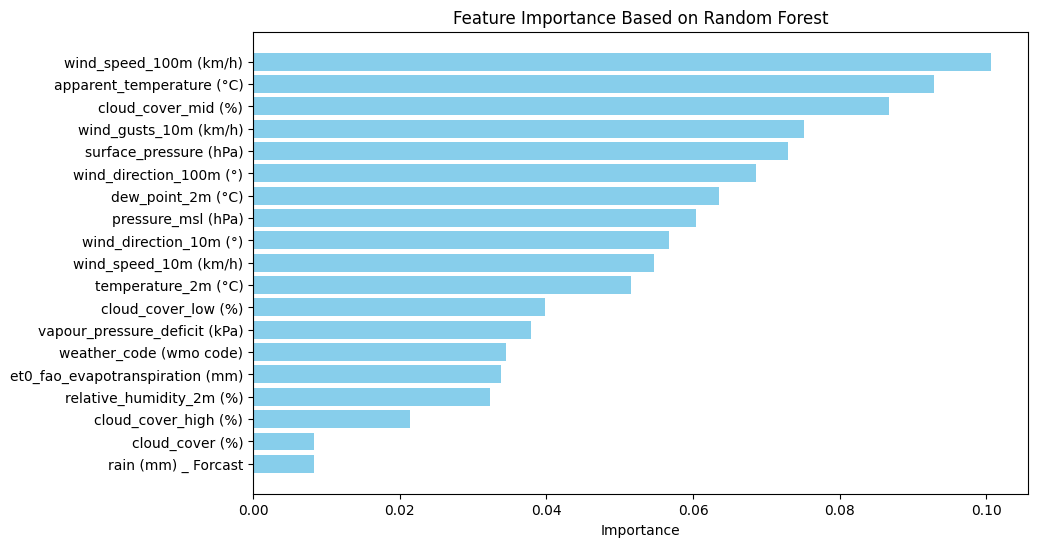

In [ ]:
import matplotlib.pyplot as plt
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance Based on Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [38]:
x_df = pd.DataFrame(X[:len(X) - 24], columns=features)
y_df = pd.DataFrame(y[24:], columns=['rain (mm) _ Historical'])
merge = pd.merge(x_df, y_df, left_index=True, right_index=True)
correlation_matrix = merge.corr()
correlation_matrix

,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),weather_code (wmo code),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),wind_gusts_10m (km/h),rain (mm) _ Forcast,rain (mm) _ Historical
temperature_2m (°C),1.000000,-0.637968,0.688864,0.963472,-0.052576,-0.528749,-0.524303,-0.053073,-0.376610,-0.343624,0.066214,0.711993,0.781905,-0.368007,-0.493711,-0.386426,-0.372634,-0.139893,-0.093730,-0.027770
relative_humidity_2m (%),-0.637968,1.000000,0.114398,-0.437508,0.111591,0.086511,0.083152,0.105263,0.239579,0.175152,0.075263,-0.771322,-0.957437,-0.057855,0.060771,0.254417,0.250155,-0.240543,0.067885,0.008888
dew_point_2m (°C),0.688864,0.114398,1.000000,0.828656,0.043813,-0.596210,-0.593437,0.023236,-0.269104,-0.279610,0.151275,0.181928,0.097155,-0.524267,-0.573569,-0.279886,-0.268091,-0.400475,-0.058911,-0.027755
apparent_temperature (°C),0.963472,-0.437508,0.828656,1.000000,-0.071211,-0.566320,-0.562128,-0.056439,-0.408793,-0.391363,0.083340,0.600157,0.617896,-0.543301,-0.640564,-0.353443,-0.344587,-0.327534,-0.114373,-0.048960
weather_code (wmo code),-0.052576,0.111591,0.043813,-0.071211,1.000000,-0.058162,-0.058959,0.272353,0.457321,0.473305,0.172444,0.141796,-0.095228,0.356288,0.257956,-0.042876,-0.035866,0.468929,0.158580,0.175992
pressure_msl (hPa),-0.528749,0.086511,-0.596210,-0.566320,-0.058162,1.000000,0.999966,-0.145157,0.218069,0.064426,-0.317310,-0.128018,-0.221639,0.187931,0.175577,0.153553,0.140253,0.119597,-0.033173,-0.147011
surface_pressure (hPa),-0.524303,0.083152,-0.593437,-0.562128,-0.058959,0.999966,1.000000,-0.146297,0.215797,0.061868,-0.317958,-0.124511,-0.218250,0.186175,0.172926,0.150840,0.137546,0.118895,-0.034069,-0.148137
cloud_cover (%),-0.053073,0.105263,0.023236,-0.056439,0.272353,-0.145157,-0.146297,1.000000,0.359579,0.359387,0.815393,-0.046494,-0.090248,0.153117,0.124958,0.144817,0.176180,0.162205,0.070209,0.125458
cloud_cover_low (%),-0.376610,0.239579,-0.269104,-0.408793,0.457321,0.218069,0.215797,0.359579,1.000000,0.524748,0.100840,-0.109791,-0.271784,0.479690,0.418472,0.181997,0.204812,0.469520,0.158408,0.108850
cloud_cover_mid (%),-0.343624,0.175152,-0.279610,-0.391363,0.473305,0.064426,0.061868,0.359387,0.524748,1.000000,0.121361,-0.141434,-0.214763,0.478513,0.460668,0.164791,0.184263,0.466313,0.212241,0.103256


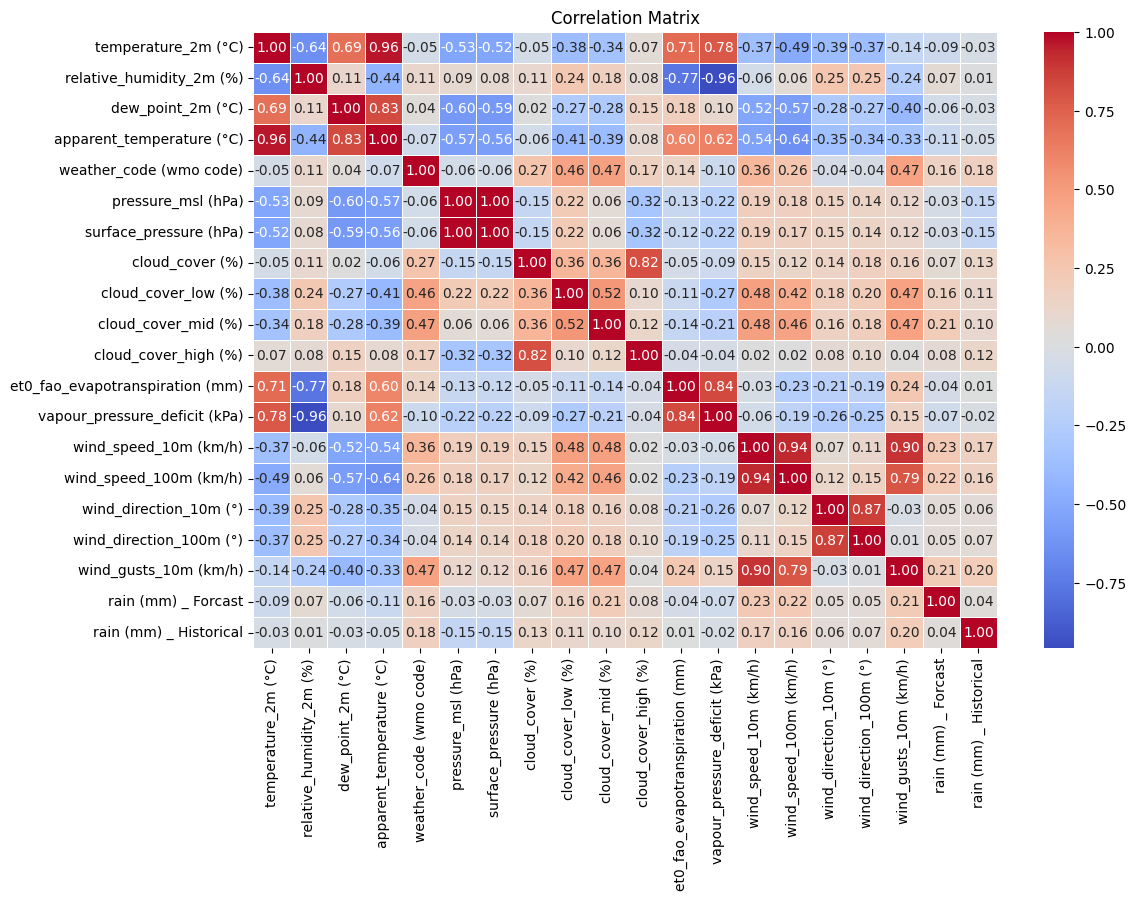

In [39]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
  # Select the top N features (for example, top 3)
top_features = feature_importance['Feature'][:3].values
top_feature_indices = [list(features).index(f) for f in top_features]
print(top_feature_indices)